## Real Estate (99acres.com) Model Building

## 1. Import sklearn Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [45]:
mum_prop = pd.read_csv('Final_Project.csv')
mum_prop

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2526,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.0,10338,2,2,2,122.0
2527,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.0,8073,11,2,2,88.0
2528,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.0,10579,6,2,2,137.0
2529,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.0,9243,6,3,3,171.0


## 3. Data Understanding

In [46]:
mum_prop.shape

(2531, 12)

In [47]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, 0 to 2530
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2531 non-null   object 
 1   Location       2531 non-null   object 
 2   Region         2531 non-null   object 
 3   Property_Age   2531 non-null   object 
 4   Availability   2531 non-null   object 
 5   Area_Tpye      2531 non-null   object 
 6   Area_SqFt      2531 non-null   float64
 7   Rate_SqFt      2531 non-null   int64  
 8   Floor_No       2531 non-null   int64  
 9   Bedroom        2531 non-null   int64  
 10  Bathroom       2531 non-null   int64  
 11  Price_Lakh     2531 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 257.1+ KB


In [48]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [49]:
mum_prop.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0
mean,949.0,16554.0,9.0,2.0,2.0,161.0
std,487.0,10204.0,8.0,1.0,1.0,162.0
min,185.0,1808.0,-1.0,1.0,1.0,13.0
25%,634.0,8751.0,3.0,1.0,2.0,66.0
50%,850.0,13636.0,6.0,2.0,2.0,110.0
75%,1150.0,22314.0,12.0,2.0,2.0,197.0
max,5000.0,55611.0,55.0,6.0,7.0,1900.0


## 4. Feature Engineering

### 4.1 Drop Unwanted Columns

In [50]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [51]:
mum_prop.drop(columns=['Property_Name', 'Location','Availability','Bathroom'], inplace =  True)
print('Shape of data :', mum_prop.shape)

Shape of data : (2531, 8)


### 4.2 Label Encoding for Categorical Columns

In [52]:
le = LabelEncoder()

In [53]:
for column in mum_prop.describe(include='object').columns:
    mum_prop[column] = le.fit_transform(mum_prop[column])

In [54]:
mum_prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2531.0,67.56,40.60,0.0,31.0,60.0,107.0,144.0
Property_Age,2531.0,1.30,1.09,0.0,0.0,1.0,2.0,4.0
Area_Tpye,2531.0,1.74,1.18,0.0,1.0,1.0,3.0,3.0
Area_SqFt,2531.0,948.77,486.83,185.0,634.5,850.0,1150.0,5000.0
Rate_SqFt,2531.0,16553.69,10204.27,1808.0,8751.0,13636.0,22314.0,55611.0
Floor_No,2531.0,8.78,7.98,-1.0,3.0,6.0,12.0,55.0
Bedroom,2531.0,1.95,0.83,1.0,1.0,2.0,2.0,6.0
Price_Lakh,2531.0,161.35,162.32,13.0,66.0,110.0,197.0,1900.0


In [55]:
mum_prop

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0
...,...,...,...,...,...,...,...,...
2526,130,1,0,1180.0,10338,2,2,122.0
2527,130,0,0,1090.0,8073,11,2,88.0
2528,130,1,0,1295.0,10579,6,2,137.0
2529,130,1,0,1850.0,9243,6,3,171.0


In [56]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2531 entries, 0 to 2530
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        2531 non-null   int32  
 1   Property_Age  2531 non-null   int32  
 2   Area_Tpye     2531 non-null   int32  
 3   Area_SqFt     2531 non-null   float64
 4   Rate_SqFt     2531 non-null   int64  
 5   Floor_No      2531 non-null   int64  
 6   Bedroom       2531 non-null   int64  
 7   Price_Lakh    2531 non-null   float64
dtypes: float64(2), int32(3), int64(3)
memory usage: 148.3 KB


### 4.3 Looking for Minimum & Maximum

In [57]:
for i in mum_prop.columns:  
    print(i,'Min value :', mum_prop[i].min(),'Max value :', mum_prop[i].max())

Region Min value : 0 Max value : 144
Property_Age Min value : 0 Max value : 4
Area_Tpye Min value : 0 Max value : 3
Area_SqFt Min value : 185.0 Max value : 5000.0
Rate_SqFt Min value : 1808 Max value : 55611
Floor_No Min value : -1 Max value : 55
Bedroom Min value : 1 Max value : 6
Price_Lakh Min value : 13.0 Max value : 1900.0


### 4.4 Correlation Heatmap

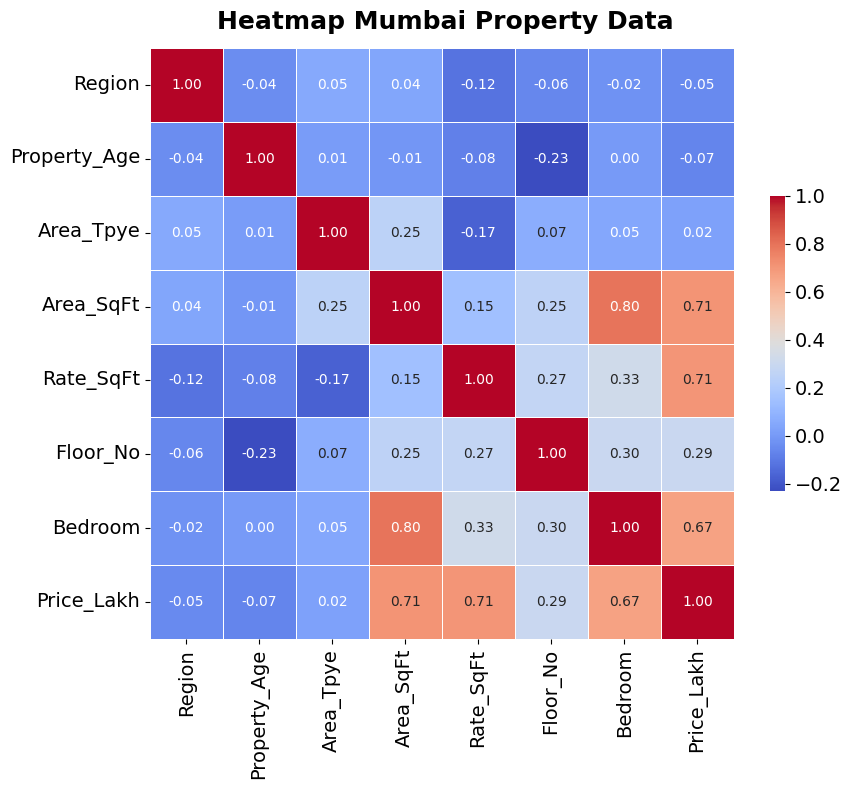

In [58]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(mum_prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

## 5. Model Building

In [59]:
mum_prop.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0


### 5.1 Train Test Split

In [60]:
X =  mum_prop.drop('Price_Lakh', axis = 1)
y =  mum_prop['Price_Lakh']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [62]:
print(X_train.shape, X_test.shape)

(2024, 7) (507, 7)


### 5.2 Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  0.8729615274576086
Test Accuracy     =  0.8696528670699653


### 5.3 Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.9603377890248981


### 5.4 Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.9753917006228885
Test Accuracy     =  0.9641944588626601


### 5.5 Polynomial Features

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9903850350980973
Test Accuracy     =  0.9821027587862007


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9832978154650837
Test Accuracy     =  0.9873735095015603


## Obeservaion :
### 1. We select the final model - Polynomial Feature.
### 2. We got 98.73 % Model Accuracy.

## 6. Final Model Evaluation

In [68]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [69]:
evaluate(poly_model, X_train, y_train)

Average Error  = 8.1346 degrees
Model Accuracy = 0.9833 %


In [70]:
evaluate(poly_model, X_test, y_test)

Average Error  = 8.7685 degrees
Model Accuracy = 0.9874 %


### 6.1 Visualizing Results

In [71]:
pred = poly_model.predict(X_test)

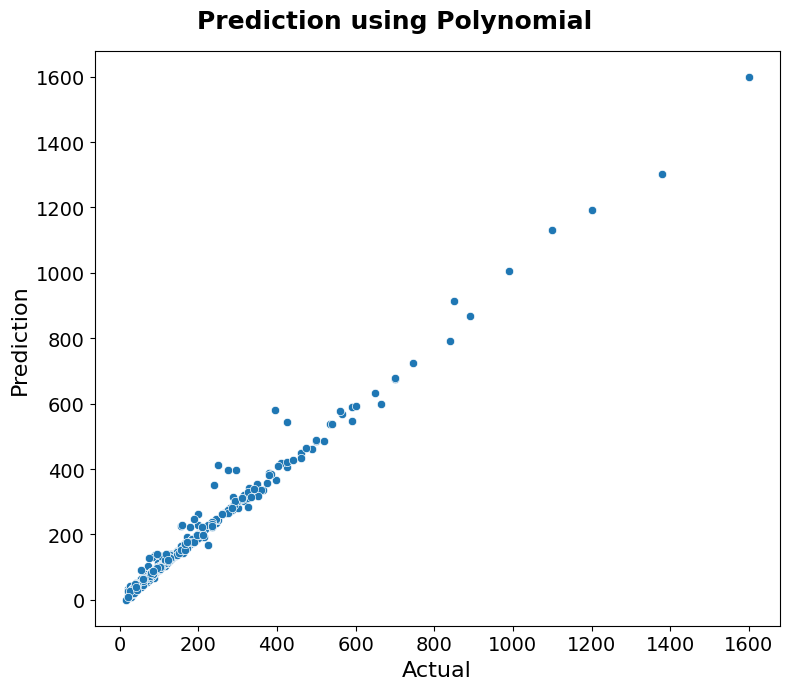

In [75]:
# print(pred, y_test)
fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=y_test, y=pred)
fig.suptitle('Prediction using Polynomial', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#fig.savefig('Prediction_Polynomial', dpi = 500)

## 7. Model Deployement

In [76]:
from pickle import dump

In [77]:
dump(poly_model,open('regression_model.pkl','wb'))

# The End !!!